Ben Starter Code

In [1]:
# Import Dependencies
import pandas as pd
import os
from unidecode import unidecode
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from babel.numbers import format_currency
from matplotlib.ticker import FuncFormatter

In [2]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player_Data_96_22.csv")
Player_Data_96_22_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
Player_Data_96_22_df_clean = Player_Data_96_22_df[["player_name", "team_abbreviation", "age",
                                                   "player_height", "player_weight", "season"]]

# Renaming columns
Player_Data_96_22_df_clean = Player_Data_96_22_df_clean.rename(columns={"player_name":"Player Name",
                                                                        "team_abbreviation":"Team (3 Letter)",
                                                                        "age":"Age",
                                                                        "player_height":"Player Height",
                                                                        "player_weight":"Player Weight",
                                                                        "season":"Season"})

# Standardizing Column text type and removing periods
Player_Data_96_22_df_clean["Player Name"] = Player_Data_96_22_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Data_96_22_df_clean["Player Name"] = Player_Data_96_22_df_clean["Player Name"].str.replace('.', '')

# Creating list of seasons to remove from file
removal_year_list = ['1996-97', '1997-98', '1998-99', '2020-21', '2021-22', '2022-23']

# Removing Seasons from file
Player_Data_96_22_df_clean = Player_Data_96_22_df_clean[~Player_Data_96_22_df_clean["Season"].isin(removal_year_list)]

# Saving cleaned file to new folder location in repo
Player_Data_96_22_df_clean.to_csv('clean_data_files/Player_Data_96_22_df_clean.csv')

In [3]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/NBA_Demographics.csv")
NBA_Demographics_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
NBA_Demographics_df_clean = NBA_Demographics_df[["Player", "Yrs", "From", "To", "Date", "City", "Region"]]

#Renaming columns
NBA_Demographics_df_clean = NBA_Demographics_df_clean.rename(columns={"Player":"Player Name",
                                                                      "Yrs":"Seasons in NBA",
                                                                      "From":"First Season Played",
                                                                      "To":"Last Season Played",
                                                                      "Date":"Birthdate",
                                                                      "City":"Birth City",
                                                                      "Region":"Birth State or Country"
                                                                      })

# Converting birthdate to year
NBA_Demographics_df_clean["Birthdate"] = pd.to_datetime(NBA_Demographics_df_clean["Birthdate"])

# Standardizing Column text type and removing periods
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Birth City"] = NBA_Demographics_df_clean["Birth City"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Birth State or Country"] = NBA_Demographics_df_clean["Birth State or Country"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].str.replace('.', '')
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].str.replace('*', '')

# Saving cleaned file to new folder location in repo
NBA_Demographics_df_clean.to_csv('clean_data_files/NBA_Demographics_df_clean.csv')

In [4]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player Info.csv")
Player_Info_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
Player_Info_df_clean = Player_Info_df[["birthDate","college",
                                       "draft_pick", "draft_round", "draft_team",
                                       "draft_year", "name"]]

#Renaming columns
Player_Info_df_clean = Player_Info_df_clean.rename(columns={"birthDate":"Birthdate",
                                                            "college":"College Name",
                                                            "draft_pick":"Draft Number Picked",
                                                            "draft_round":"Draft Round",
                                                            "draft_team":"Draft Team",
                                                            "draft_year":"Draft Year",
                                                            "name":"Player Name"
                                                            })

# Converting birthdate into year
Player_Info_df_clean["Birthdate"] = pd.to_datetime(Player_Info_df_clean["Birthdate"])

# # Standardizing Column text type and removing periods
Player_Info_df_clean["Player Name"] = Player_Info_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Info_df_clean["Player Name"] = Player_Info_df_clean["Player Name"].str.replace('.', '')

# Saving cleaned file to new folder location in repo
Player_Info_df_clean.to_csv('clean_data_files/Player_Info_df_clean.csv')

In [5]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/NBA_Team_Names.csv")
NBA_Team_Names_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
NBA_Team_Names_df_clean = NBA_Team_Names_df[["abbreviation", "city", 'state', "full_name"]]

#Renaming columns
NBA_Team_Names_df_clean = NBA_Team_Names_df_clean.rename(columns={"abbreviation":"Team (3 Letter)",
                                                                  "city":"Team City",
                                                                  "state":"Team State",
                                                                  "full_name":"Team Name"})

# Saving cleaned file to new folder location in repo
NBA_Team_Names_df_clean.to_csv('clean_data_files/NBA_Team_Names_df_clean.csv')

In [6]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player_Salaries.csv")
Player_Salaries_df_clean = pd.read_csv(file_name)

# # Standardizing Column text type and removing periods
Player_Salaries_df_clean["Player Name"] = Player_Salaries_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Salaries_df_clean["Player Name"] = Player_Salaries_df_clean["Player Name"].str.replace('.', '')

# Saving cleaned file to new folder location in repo
Player_Salaries_df_clean.to_csv('clean_data_files/Player_Salaries_df_clean.csv')

In [7]:
# Merging Data Frames
merge_df_1 = pd.merge(NBA_Demographics_df_clean, Player_Info_df_clean, on=["Player Name", "Birthdate"], how="left")
merge_df_1.to_csv("merged_data files/first_merge_attempt.csv")

In [8]:
# Merging Data Frames
merge_df_2 = pd.merge(Player_Data_96_22_df_clean, Player_Salaries_df_clean, on=["Player Name", "Season"], how="left")
merge_df_2.to_csv("merged_data files/second_merge_attempt.csv")

In [9]:
# Merging Data Frames
merge_df_3 = pd.merge(merge_df_1, merge_df_2, on=["Player Name"], how="left")
merge_df_3.to_csv("merged_data files/third_merge_attempt.csv")

In [10]:
# Merging Data Frames
merge_df_4 = pd.merge(merge_df_3, NBA_Team_Names_df_clean, on=["Team (3 Letter)"], how="left")
merge_df_4.to_csv("merged_data files/fourth_merge_attempt.csv")

In [11]:
# Filtering Data Frames for years 1999 - 2019
merge_df_4_filtered = merge_df_4[merge_df_4["First Season Played"] >= 1999]
merge_df_4_filtered = merge_df_4_filtered[merge_df_4_filtered["First Season Played"] <= 2019]
merge_df_4_filtered = merge_df_4_filtered.sort_values(by=['Player Name', 'Season'], ascending=[True, True])

filter_merged_sorted_df = merge_df_4_filtered[["Player Name",
                                               "Birthdate",
                                               "Birth City",
                                               "Birth State or Country",
                                               "College Name",
                                               "Draft Team",
                                               "Draft Year",
                                               "Draft Round",
                                               "Draft Number Picked",
                                               "Seasons in NBA",
                                               "First Season Played",
                                               "Last Season Played",
                                               "Season",
                                               "Age",
                                               "Player Height",
                                               "Player Weight",
                                               "Team (3 Letter)",
                                               "Team City",
                                               "Team Name",
                                               "Salary"
]]

merge_df_4_filtered.to_csv("merged_data files/fouth_merge_attempt_filtered.csv")


In [12]:
# # Looping through files in Cities_States_Countries and standardizing text for joins
# folder_path = 'data_files/Cities_States_Countries/'
# # Iterate over each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         # Create the full file path
#         file_path = os.path.join(folder_path, filename)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Iterate over columns and rows in the DataFrame
#         for column in df.columns:
#             df[column] = df[column].apply(lambda x: unidecode(str(x)) if isinstance(x, str) else x)
            
#         # Save the modified DataFrame to a new CSV file
#         output_csv_file = os.path.join(folder_path, f'converted_{filename}')
#         df.to_csv(output_csv_file, index=False)

In [13]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Cities_States_Countries/converted_states.csv")
states_clean = pd.read_csv(file_name)

# # Keeping only the desired columns and then renaming them
states_clean = states_clean[["name", "country_id", "latitude", "longitude"]]

# Renaming columns
states_clean = states_clean.rename(columns={"name":"State",
                                            "latitude":"state latitude",
                                            "longitude":"state longitude"
                                            })

In [14]:
file_name = Path("data_files/Cities_States_Countries/converted_countries.csv")
countries_clean = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
countries_clean = countries_clean[["id", "name", "latitude", "longitude"]]

# Renaming columns
countries_clean = countries_clean.rename(columns={"id":"country_id",
                                            "name":"Country"})

# Saving cleaned file to new folder location in repo
countries_clean.to_csv('data_files/Cities_States_Countries/countries_clean.csv')

In [15]:
# Merging cities, stastes, countries files
locations = pd.merge(states_clean, countries_clean, on='country_id', how="left")

locations.head()

,State,country_id,state latitude,state longitude,Country,latitude,longitude
0,Badakhshan,1,36.734772,70.811995,Afghanistan,33.0,65.0
1,Badghis,1,35.167134,63.769538,Afghanistan,33.0,65.0
2,Baghlan,1,36.178903,68.745306,Afghanistan,33.0,65.0
3,Balkh,1,36.755060,66.897537,Afghanistan,33.0,65.0
4,Bamyan,1,34.810007,67.821210,Afghanistan,33.0,65.0


In [16]:
# Merging files
adding_location = pd.merge(merge_df_4_filtered, locations,
                     how='left', 
                     left_on=['Birth State or Country'], 
                     right_on=['State'])

# Creating column for United States and International designation
adding_location.loc[adding_location['Country'] != 'United States', 'Country'] = 'International'

# Filling in blanks for College
adding_location.loc[adding_location['College Name'].isna(), 'College Name'] = 'NaN'

# Filling in blanks with 'Undrafted'
adding_location.loc[adding_location['Draft Number Picked'].isna(), 'Draft Number Picked'] = 'Undrafted'
adding_location.loc[adding_location['Draft Round'].isna(), 'Draft Round'] = 'Undrafted'
adding_location.loc[adding_location['Draft Team'].isna(), 'Draft Team'] = 'Undrafted'
adding_location.loc[adding_location['Draft Year'].isna(), 'Draft Year'] = 'Undrafted'

# Removing columns from previous merge
adding_location = adding_location.drop(['country_id', 'State'], axis=1)

# Converting birthdate to year
adding_location["Birthdate"] = pd.to_datetime(adding_location["Birthdate"]).dt.year

# Removing rows where 'Team Name' is blank
adding_location = adding_location.dropna(subset=['Team Name'])


adding_location.to_csv("merged_data files/adding_location.csv")

In [17]:
# Reading in file for stadium locations
file_name = Path("data_files/stadiums.csv")
stadiums = pd.read_csv(file_name)

# Merging in data for team locations
adding_stadiums = pd.merge(adding_location, stadiums, how='left', left_on='Team Name', right_on='Team')
adding_stadiums = adding_stadiums.rename(columns={"Lat":"Team Latitude",
                                            "Long":"Team Longitude"})

# Dropping columns from previous merge
adding_stadiums = adding_stadiums.drop(['Division', 'League', 'Team'], axis=1)

adding_stadiums.to_csv("merged_data files/adding_stadiums.csv")

In [18]:
# Create Regions
regions = {"California": "West", 
           "Hawaii": "West", 
           "Alaska": "West", 
           "Oregon": "West", 
           "Washington": "West", 
           "Nevada": "West",
           "Idaho": "Mountain West", 
           "Montana": "Mountain West", 
           "Wyoming": "Mountain West", 
           "Utah": "Mountain West", 
           "Colorado": "Mountain West",
           "North Dakota": "Midwest", 
           "South Dakota": "Midwest", 
           "Nebraska": "Midwest", 
           "Kansas": "Midwest", 
           "Missouri": "Midwest", 
           "Iowa": "Midwest", 
           "Minnesota": "Midwest", 
           "Wisconsin": "Midwest", 
           "Illinois": "Midwest", 
           "Indiana": "Midwest", 
           "Michigan": "Midwest",
           "Ohio": "Midwest",
           "Arizona": "Southwest", 
           "New Mexico": "Southwest", 
           "Texas": "Southwest", 
           "Oklahoma": "Southwest",
           "Louisiana": "Southeast", 
           "Arkansas": "Southeast", 
           "Mississippi": "Southeast", 
           "Alabama": "Southeast", 
           "Tennessee": "Southeast", 
           "Kentucky": "Southeast", 
           "West Virginia": "Southeast", 
           "Virginia": "Southeast", 
           "North Carolina": "Southeast", 
           "South Carolina": "Southeast", 
           "Georgia": "Southeast", 
           "Florida": "Southeast",
           "Maine": "Northeast", 
           "New Hampshire": "Northeast", 
           "Vermont": "Northeast", 
           "Massachusetts": "Northeast", 
           "Rhode Island": "Northeast", 
           "Connecticut": "Northeast", 
           "New York": "Northeast", 
           "New Jersey": "Northeast",
           "Delaware": "Northeast", 
           "Maryland": "Northeast", 
           "Pennsylvania": "Northeast",
           "District of Columbia": "Northeast"}

In [19]:
# Apply the mapping function to create the 'Region' column
adding_stadiums['Region'] = adding_stadiums['Birth State or Country'].apply(lambda state: regions.get(state, 'International'))
adding_stadiums

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude,Region
0,AJ Bramlett,1,2000,2000,1977,Dekalb,Illinois,University of Arizona,39th overall,2nd round,...,Ohio,Cleveland Cavaliers,40.633125,-89.398528,United States,38.0,-97.0,41.496389,-81.688056,Midwest
1,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
2,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
3,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,California,Golden State Warriors,40.633125,-89.398528,United States,38.0,-97.0,37.768056,-122.387500,Midwest
4,AJ Hammons,1,2017,2017,1992,Gary,Indiana,Purdue University,46th overall,2nd round,...,Texas,Dallas Mavericks,40.267194,-86.134902,United States,38.0,-97.0,32.790556,-96.810278,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,Zhou Qi,2,2018,2019,1996,Henan,China,NaN,43rd overall,2nd round,...,Texas,Houston Rockets,NaN,NaN,International,NaN,NaN,29.750833,-95.362222,International
8059,Zoran Dragic,1,2015,2015,1989,Ljubljana,Slovenia,NaN,Undrafted,Undrafted,...,Florida,Miami Heat,NaN,NaN,International,NaN,NaN,25.781389,-80.188056,International
8060,Zoran Planinic,3,2004,2006,1982,Mostar,Bosnia and Herzegovina,NaN,22nd overall,1st round,...,New York,New York Knicks,NaN,NaN,International,NaN,NaN,40.750556,-73.993611,International
8061,Zoran Planinic,3,2004,2006,1982,Mostar,Bosnia and Herzegovina,NaN,22nd overall,1st round,...,New York,New York Knicks,NaN,NaN,International,NaN,NaN,40.750556,-73.993611,International


In [20]:
# Get 5 year data
season_2004_to_2005 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2004-05",:])
season_2009_to_2010 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2009-10",:])
season_2014_to_2015 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2014-15",:])
season_2019_to_2020 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2019-20",:])

In [21]:
# Remove unneed columns
season_2004_to_2005 = season_2004_to_2005[['Player Name', 'Region']]
season_2009_to_2010 = season_2009_to_2010[['Player Name', 'Region']]
season_2014_to_2015 = season_2014_to_2015[['Player Name', 'Region']]
season_2019_to_2020 = season_2019_to_2020[['Player Name', 'Region']]


In [22]:
# Count how many players are from each region during each time period
region_counts_2020 = season_2019_to_2020['Region'].value_counts().reset_index()
region_counts_2015 = season_2014_to_2015['Region'].value_counts().reset_index()
region_counts_2010 = season_2009_to_2010['Region'].value_counts().reset_index()
region_counts_2005 = season_2004_to_2005['Region'].value_counts().reset_index()
region_counts_2015

,Region,count
0,International,106
1,Midwest,94
2,Southeast,94
3,West,91
4,Northeast,76
5,Southwest,27
6,Mountain West,4


In [23]:
#Rename count column
region_counts_2020 = region_counts_2020.rename(columns={'count': '2020 Count'})
region_counts_2015 = region_counts_2015.rename(columns={'count': '2015 Count'})
region_counts_2010 = region_counts_2010.rename(columns={'count': '2010 Count'})
region_counts_2005 = region_counts_2005.rename(columns={'count': '2005 Count'})

# Merge dataframes
merged_5_year_data = pd.merge(region_counts_2005, region_counts_2010, on=["Region"], how ="inner")
merged_5_year_data = pd.merge(merged_5_year_data, region_counts_2015, on=["Region"], how ="inner")
merged_5_year_data = pd.merge(merged_5_year_data, region_counts_2020, on=["Region"], how ="inner")
merged_5_year_data

,Region,2005 Count,2010 Count,2015 Count,2020 Count
0,Midwest,81,82,94,78
1,International,68,86,106,103
2,Southeast,61,80,94,81
3,Northeast,52,65,76,64
4,West,43,70,91,55
5,Southwest,16,30,27,29
6,Mountain West,6,6,4,3


In [24]:
# Remove Duplicates
no_dup_nba_region_data = adding_stadiums.drop_duplicates(subset="Player Name")
no_dup_nba_region_data

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude,Region
0,AJ Bramlett,1,2000,2000,1977,Dekalb,Illinois,University of Arizona,39th overall,2nd round,...,Ohio,Cleveland Cavaliers,40.633125,-89.398528,United States,38.0,-97.0,41.496389,-81.688056,Midwest
1,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
4,AJ Hammons,1,2017,2017,1992,Gary,Indiana,Purdue University,46th overall,2nd round,...,Texas,Dallas Mavericks,40.267194,-86.134902,United States,38.0,-97.0,32.790556,-96.810278,Midwest
5,AJ Price,6,2010,2015,1986,Orange,New Jersey,University of Connecticut,52nd overall,2nd round,...,Indiana,Indiana Pacers,40.058324,-74.405661,United States,38.0,-97.0,39.763889,-86.155556,Northeast
11,Aaron Brooks,10,2008,2018,1985,Seattle,Washington,University of Oregon,26th overall,1st round,...,Texas,Houston Rockets,47.751074,-120.740139,United States,38.0,-97.0,29.750833,-95.362222,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,Zendon Hamilton,6,2001,2006,1975,Floral Park,New York,St. John's University,Undrafted,Undrafted,...,California,LA Clippers,40.712775,-74.005973,United States,38.0,-97.0,34.043056,-118.267222,Northeast
8055,Zhaire Smith,2,2019,2020,1999,Garland,Texas,Texas Tech University,16th overall,1st round,...,Pennsylvania,Philadelphia 76ers,31.968599,-99.901813,United States,38.0,-97.0,39.901111,-75.171944,Southwest
8057,Zhou Qi,2,2018,2019,1996,Henan,China,NaN,43rd overall,2nd round,...,Texas,Houston Rockets,NaN,NaN,International,NaN,NaN,29.750833,-95.362222,International
8059,Zoran Dragic,1,2015,2015,1989,Ljubljana,Slovenia,NaN,Undrafted,Undrafted,...,Florida,Miami Heat,NaN,NaN,International,NaN,NaN,25.781389,-80.188056,International


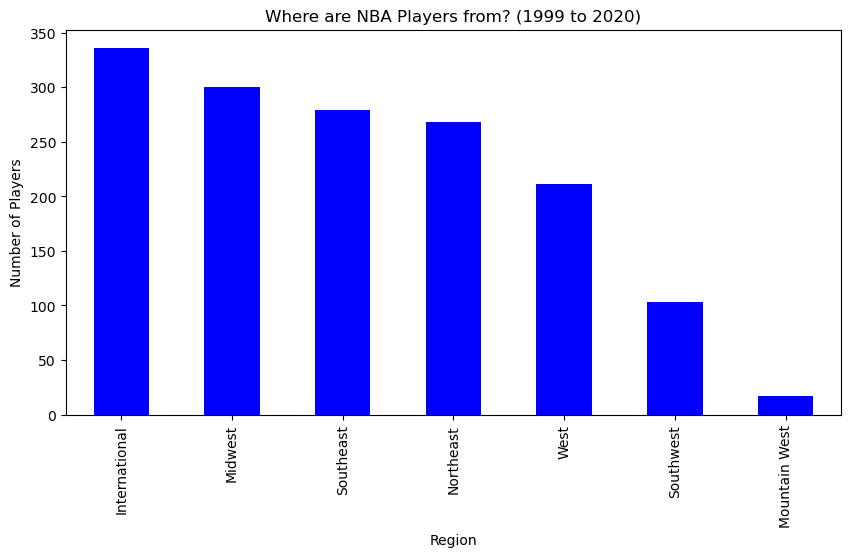

In [25]:
# Create Bar Chart for Player Region Data
region_data = no_dup_nba_region_data.groupby(['Region']).count()
region_bar_data = region_data['Player Name']
region_bar_data = region_bar_data.sort_values(ascending = False)
region_bar_data.plot(kind = 'bar', figsize = (10,5), color = 'blue', align = 'center')
plt.title("Where are NBA Players from? (1999 to 2020)")
plt.xlabel("Region")
plt.ylabel("Number of Players")
plt.show()

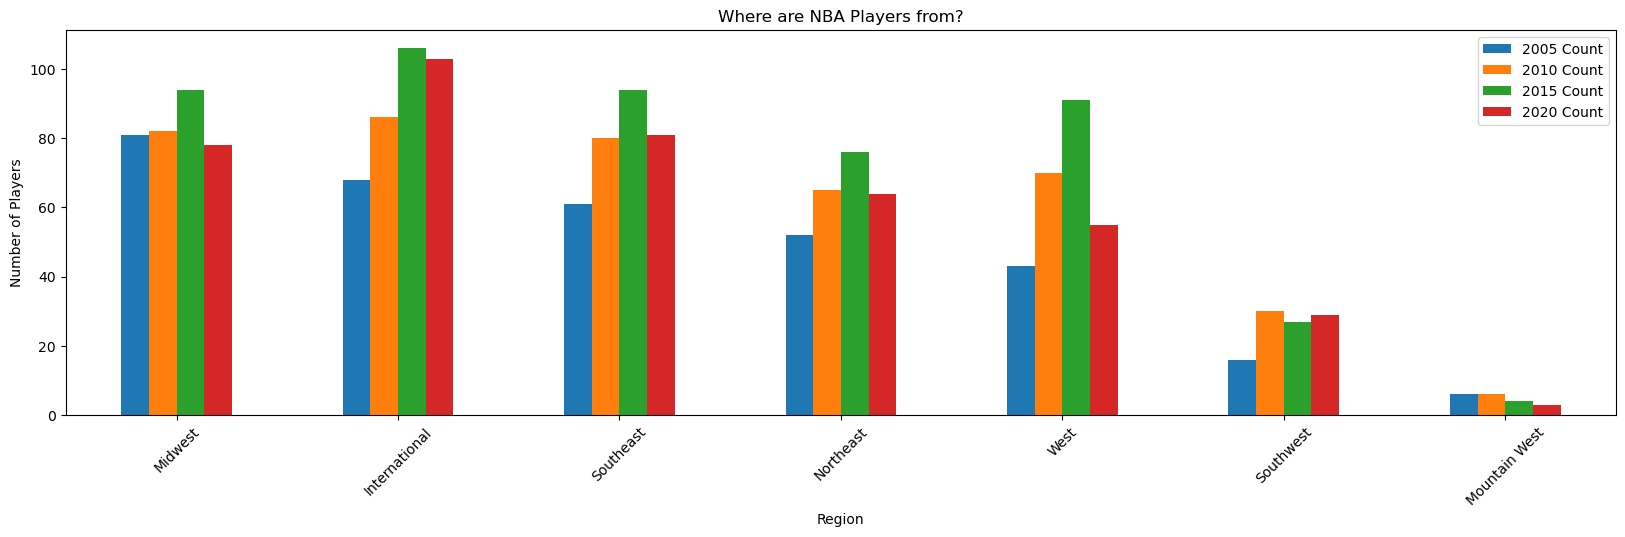

<Figure size 640x480 with 0 Axes>

In [26]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = merged_5_year_data.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(merged_5_year_data["Region"], rotation=45)

plt.title("Where are NBA Players from?")
plt.xlabel("Region")
plt.ylabel("Number of Players")
plt.show()
plt.show()
plt.tight_layout()

In [27]:
team_map_df = adding_stadiums.groupby(['Team Name', 'Team Latitude', 'Team Longitude'])["Player Name"].nunique().reset_index(name='UniquePlayerCount')

team_unique_players = team_map_df.hvplot.points(
    "Team Longitude",
    "Team Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "UniquePlayerCount",
    scale = 1.5,
    color = "Team Name",
    title="Unique Players for Each Team"
)

team_unique_players

c:\Users\tokar\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Team Longitude,Team Latitude]   (Team Name,UniquePlayerCount)

In [28]:
us_players_only = adding_stadiums[adding_stadiums['Country'] != 'International']
state_map_df = us_players_only.groupby(['Birth State or Country', 'state latitude', 'state longitude'])["Player Name"].nunique().reset_index(name='UniquePlayerCount')
state_unique_players = state_map_df.hvplot.points(
    "state longitude",
    "state latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "UniquePlayerCount",
    scale = 2,
    color = "Birth State or Country",
    title="Which US States do NBA Players come from?"
)
state_unique_players

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [state longitude,state latitude]   (Birth State or Country,UniquePlayerCount)

In [29]:
international_players_only = adding_stadiums[adding_stadiums['Country'] != 'United States']
international_players_map_df = international_players_only.groupby(['Team Name', 'Team Latitude', 'Team Longitude'])["Player Name"].nunique().reset_index(name='UniquePlayerCount')
team_map_df
international_players_map = international_players_map_df.hvplot.points(
    "Team Longitude",
    "Team Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "UniquePlayerCount",
    scale = 2,
    color = "Team Name",
    title="Where do international players play?"
)
international_players_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Team Longitude,Team Latitude]   (Team Name,UniquePlayerCount)

In [30]:
#Create new dataframe for Seasons in NBA along with regions
player_seasons = adding_stadiums[['Player Name', 'Seasons in NBA', 'Region', 'Birth State or Country']]
player_seasons

# Remove Duplicates
no_dup_player_seasons_data = player_seasons.drop_duplicates(subset="Player Name")
no_dup_player_seasons_data

,Player Name,Seasons in NBA,Region,Birth State or Country
0,AJ Bramlett,1,Midwest,Illinois
1,AJ Guyton,3,Midwest,Illinois
4,AJ Hammons,1,Midwest,Indiana
5,AJ Price,6,Northeast,New Jersey
11,Aaron Brooks,10,West,Washington
...,...,...,...,...
8049,Zendon Hamilton,6,Northeast,New York
8055,Zhaire Smith,2,Southwest,Texas
8057,Zhou Qi,2,International,China
8059,Zoran Dragic,1,International,Slovenia


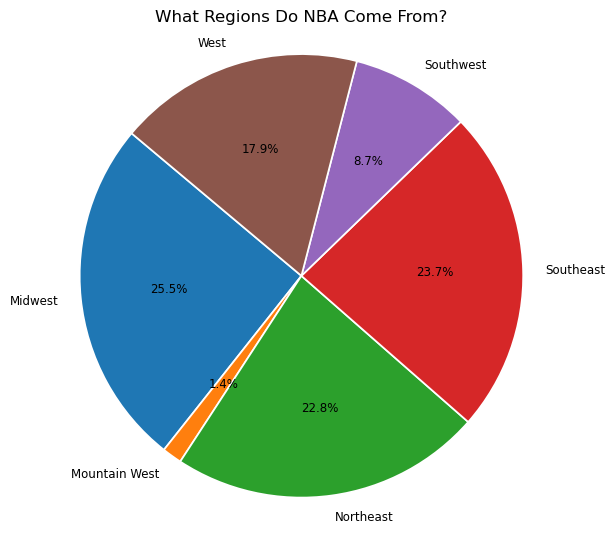

In [50]:
us_pie_chart_df = no_dup_player_seasons_data.groupby(['Region'])["Player Name"].nunique().reset_index(name='UniquePlayerCount')
us_pie_chart_df = us_pie_chart_df[us_pie_chart_df['Region'] != 'International']
textprops = {"fontsize":8.5}
plt.pie(us_pie_chart_df['UniquePlayerCount'], labels=us_pie_chart_df['Region'], radius=1.5, textprops=textprops, autopct='%1.1f%%', labeldistance=1.1, wedgeprops = {'linewidth' : 1.25, 'edgecolor' : 'white'}, startangle=140)
plt.title("What Regions Do NBA Come From?", pad=50)
plt.show()



In [32]:
#Create list of states to filter out
states = ["California", "Hawaii", "Alaska", "Oregon", "Washington", "Nevada", "Idaho", "Montana", "Wyoming", "Utah",
          "Colorado", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Missouri", "Iowa", "Minnesota",
          "Wisconsin", "Illinois", "Indiana", "Michigan", "Ohio", "Arizona", "New Mexico", "Texas", "Oklahoma",
          "Louisiana", "Arkansas", "Mississippi", "Alabama", "Tennessee", "Kentucky", "West Virginia", "Virginia",
          "North Carolina", "South Carolina", "Georgia", "Florida", "Maine", "New Hampshire", "Vermont",
          "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Delaware", "Maryland",
          "Pennsylvania", "District of Columbia"]

# Remove rows where 'state' is in the list
international_players_data = no_dup_nba_region_data[~no_dup_nba_region_data['Birth State or Country'].isin(states)]
international_players_data

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude,Region
43,Abdel Nader,5,2018,2022,1993,Alexandria,Egypt,"Northern Illinois University, Iowa State Unive...",58th overall,2nd round,...,Massachusetts,Boston Celtics,NaN,NaN,International,NaN,NaN,42.366303,-71.062228,International
84,Al Horford,15,2008,2022,1986,Puerto Plata,Dominican Republic,University of Florida,3rd overall,1st round,...,Georgia,Atlanta Hawks,NaN,NaN,International,NaN,NaN,33.757222,-84.396389,International
155,Aleksandar Radojevic,2,2000,2005,1976,Herceg Novi,Montenegro,Barton County Community College,12th overall,1st round,...,Canada,Toronto Raptors,NaN,NaN,International,NaN,NaN,43.643333,-79.379167,International
157,Alex Abrines,3,2017,2019,1993,Palma de Mallorca,Spain,NaN,32nd overall,2nd round,...,Oklahoma,Oklahoma City Thunder,NaN,NaN,International,NaN,NaN,35.463333,-97.515000,International
165,Alex Garcia,2,2004,2005,1980,Orlandia,Brazil,NaN,Undrafted,Undrafted,...,Texas,San Antonio Spurs,NaN,NaN,International,NaN,NaN,29.426944,-98.437500,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,Zarko Cabarkapa,3,2004,2006,1981,Zrenjanin,Serbia,NaN,17th overall,1st round,...,Arizona,Phoenix Suns,NaN,NaN,International,NaN,NaN,33.445833,-112.071389,International
8044,Zeljko Rebraca,5,2002,2006,1972,Apatin,Serbia,NaN,54th overall,2nd round,...,Michigan,Detroit Pistons,NaN,NaN,International,NaN,NaN,42.341111,-83.055000,International
8057,Zhou Qi,2,2018,2019,1996,Henan,China,NaN,43rd overall,2nd round,...,Texas,Houston Rockets,NaN,NaN,International,NaN,NaN,29.750833,-95.362222,International
8059,Zoran Dragic,1,2015,2015,1989,Ljubljana,Slovenia,NaN,Undrafted,Undrafted,...,Florida,Miami Heat,NaN,NaN,International,NaN,NaN,25.781389,-80.188056,International


In [33]:
filtered_international_players_data = international_players_data[['Player Name', 'Birth State or Country']]
filtered_international_players_data

,Player Name,Birth State or Country
43,Abdel Nader,Egypt
84,Al Horford,Dominican Republic
155,Aleksandar Radojevic,Montenegro
157,Alex Abrines,Spain
165,Alex Garcia,Brazil
...,...,...
8025,Zarko Cabarkapa,Serbia
8044,Zeljko Rebraca,Serbia
8057,Zhou Qi,China
8059,Zoran Dragic,Slovenia


In [34]:
world_regions = {"Egypt": "Northern Africa",
                 "Dominican Republic": "Caribbean",
                 "Montenegro": "Southern Europe",
                 "Spain": "Southern Europe",
                 "Brazil": "South America",
                 "Ukraine": "Eastern Europe",
                 "France": "Western Europe",
                 "Luxembourg": "Western Europe",
                 "Italy": "Southern Europe",
                 "Greece": "Southern Europe",
                 "Argentina": "South America",
                 "Australia": "Australia and New Zealand",
                 "Austria": "Eastern Europe",
                 "Bahamas": "Caribbean",
                 "Belgium": "Western Europe",
                 "Bosnia and Herzegovina": "Southern Europe",
                 "Cameroon": "Central Africa",
                 "Canada": "North America",
                 "Cape Verde": "Western Africa",
                 "China": "Eastern Asia",
                 "Croatia": "Southern Europe",
                 "Cuba": "Caribbean",
                 "Czech Republic": "Eastern Europe",
                 "Democratic Republic of the Congo": "Middle Africa",
                 "Dominica": "Caribbean",
                 "Finland": "Northern Europe",
                 "Japan": "Eastern Asia",
                 "French Guiana": "South America",
                 "Gabon": "Middle Africa",
                 "Germany": "Western Europe",
                 "Ghana": "Western Africa",
                 "Guadeloupe": "Caribbean",
                 "Guyana": "South America",
                 "Haiti": "Caribbean",
                 "Hungary": "Eastern Europe",
                 "Ireland": "Northern Europe",
                 "Islamic Republic of Iran": "Western Asia",
                 "Israel": "Western Asia",
                 "Latvia": "Eastern Europe",
                 "Lithuania": "Northen Europe",
                 "Mali": "Western Africa",
                 "Martinique": "Caribbean",
                 "Mexico": "Central America",
                 "Netherlands": "Western Europe", 
                 "New_Zealand": "Australia and New Zealand",
                 "Nigeria": "Western Africa", 
                 "Panama": "Central America",
                 "Poland": "Eastern Europe",
                 "Puerto Rico": "Caribbean",
                 "Republic of Macedonia": "Southern Europe",
                 "Republic of the Congo": "Middle Africa",
                 "Saint Lucia": "Caribbean",
                 "Senegal": "Western Africa",
                 "Serbia": "Southern Europe",
                 "Slovenia": "Southern Europe",
                 "South Sudan": "Eastern Africa",
                 "Sweden": "Northern Europe",
                 "Switzerland": "Western Europe",
                 "Taiwan": "Eastern Asia",
                 "Tunisia": "Northern Africa",
                 "Turkey": "Western Asia",
                 "United Kingdom": "Northern Europe", 
                 "United Republic of Tanzania": "Eastern Africa",
                 "Uruguay": "South America", 
                 "US Virgin Islands": "Caribbean",
                 "Venezuela": "South America"}

In [35]:
filtered_international_players_data['World Region'] = filtered_international_players_data['Birth State or Country'].apply(lambda state: world_regions.get(state))
filtered_international_players_data

C:\Users\tokar\AppData\Local\Temp\ipykernel_24236\2803817092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_international_players_data['World Region'] = filtered_international_players_data['Birth State or Country'].apply(lambda state: world_regions.get(state))


,Player Name,Birth State or Country,World Region
43,Abdel Nader,Egypt,Northern Africa
84,Al Horford,Dominican Republic,Caribbean
155,Aleksandar Radojevic,Montenegro,Southern Europe
157,Alex Abrines,Spain,Southern Europe
165,Alex Garcia,Brazil,South America
...,...,...,...
8025,Zarko Cabarkapa,Serbia,Southern Europe
8044,Zeljko Rebraca,Serbia,Southern Europe
8057,Zhou Qi,China,Eastern Asia
8059,Zoran Dragic,Slovenia,Southern Europe


In [36]:
# The values of each section of the pie chart
international_player_count = filtered_international_players_data['World Region'].value_counts().reset_index()
international_player_counter = international_player_count['count']
# Create Variable for labels
labels = international_player_count["World Region"]

In [37]:
# Set Variables for pie chart
textprops = {"fontsize":8.5}
total = sum(international_player_counter)
labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, international_player_counter)]

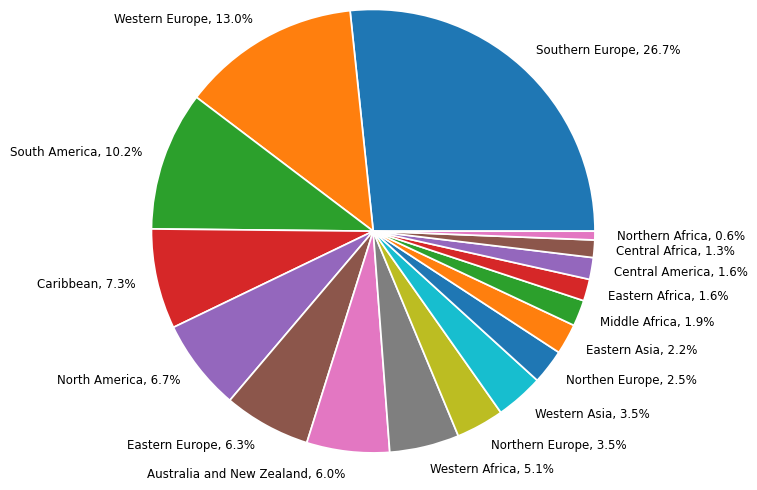

In [38]:
plt.pie(international_player_counter, radius=1.5,labels=labels, textprops=textprops, labeldistance=1.1, wedgeprops = {'linewidth' : 1.25, 'edgecolor' : 'white'})
plt.show()

In [39]:
# Clean data for player salaries
player_salaries = adding_stadiums[['Player Name', 'Salary', 'Birth State or Country', 'Region', 'Season']]
player_salaries = player_salaries.dropna(subset=['Salary'])

In [40]:
# Get average salary for each region
average_salaries = player_salaries[['Region', 'Salary']]
average_salaries.astype({'Region':'str','Salary':'int'})
average_salaries = average_salaries.groupby('Region')['Salary'].mean().reset_index()
average_salaries = average_salaries.sort_values("Salary", ascending=True)

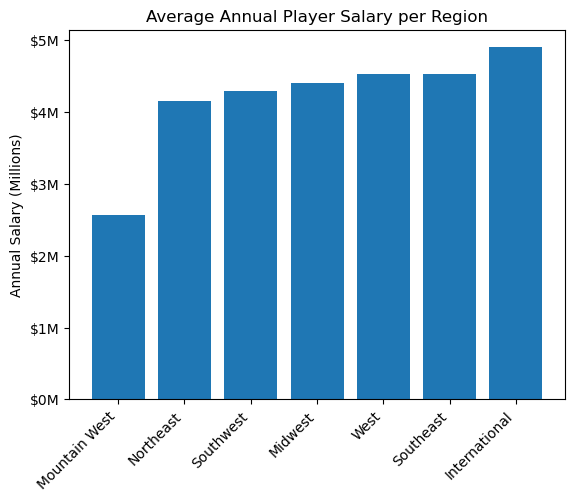

In [41]:
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

# Create a bar plot with the formatted y-axis labels
plt.bar(average_salaries['Region'], average_salaries['Salary'])
plt.ylabel('Annual Salary (Millions)')
plt.yscale('linear')  # Use linear scale for y-axis

# Apply the millions_formatter to the y-axis ticks
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45, ha='right')
# Show or save the plot
plt.title('Average Annual Player Salary per Region')
plt.show()

In [42]:
# Get 5 year data for player salaries
salaries_season_2004_to_2005 = pd.DataFrame(player_salaries.loc[player_salaries["Season"] == "2004-05",:])
salaries_season_2009_to_2010 = pd.DataFrame(player_salaries.loc[player_salaries["Season"] == "2009-10",:])
salaries_season_2014_to_2015 = pd.DataFrame(player_salaries.loc[player_salaries["Season"] == "2014-15",:])
salaries_season_2019_to_2020 = pd.DataFrame(player_salaries.loc[player_salaries["Season"] == "2019-20",:])

In [43]:
# Remove unneed columns for player salaries
salaries_season_2004_to_2005 = salaries_season_2004_to_2005[['Region', 'Salary']]
salaries_season_2009_to_2010 = salaries_season_2009_to_2010[['Region', 'Salary']]
salaries_season_2014_to_2015 = salaries_season_2014_to_2015[['Region', 'Salary']]
salaries_season_2019_to_2020 = salaries_season_2019_to_2020[['Region', 'Salary']]

In [44]:
#Get Average for each season
average_salaries_2005 = salaries_season_2004_to_2005.groupby('Region')['Salary'].mean().reset_index()
average_salaries_2010 = salaries_season_2009_to_2010.groupby('Region')['Salary'].mean().reset_index()
average_salaries_2015 = salaries_season_2014_to_2015.groupby('Region')['Salary'].mean().reset_index()
average_salaries_2020 = salaries_season_2019_to_2020.groupby('Region')['Salary'].mean().reset_index()
#Rename Columns
average_salaries_2005 = average_salaries_2005.rename(columns={"Salary":"2005 Salary"})
average_salaries_2010 = average_salaries_2010.rename(columns={"Salary":"2010 Salary"})
average_salaries_2015 = average_salaries_2015.rename(columns={"Salary":"2015 Salary"})
average_salaries_2020 = average_salaries_2020.rename(columns={"Salary":"2020 Salary"})

In [45]:
#Merge Data
salaries_merged_5_year_data = pd.merge(average_salaries_2005, average_salaries_2010, on=["Region"], how ="inner")
salaries_merged_5_year_data = pd.merge(salaries_merged_5_year_data, average_salaries_2015, on=["Region"], how ="inner")
salaries_merged_5_year_data = pd.merge(salaries_merged_5_year_data, average_salaries_2020, on=["Region"], how ="inner")

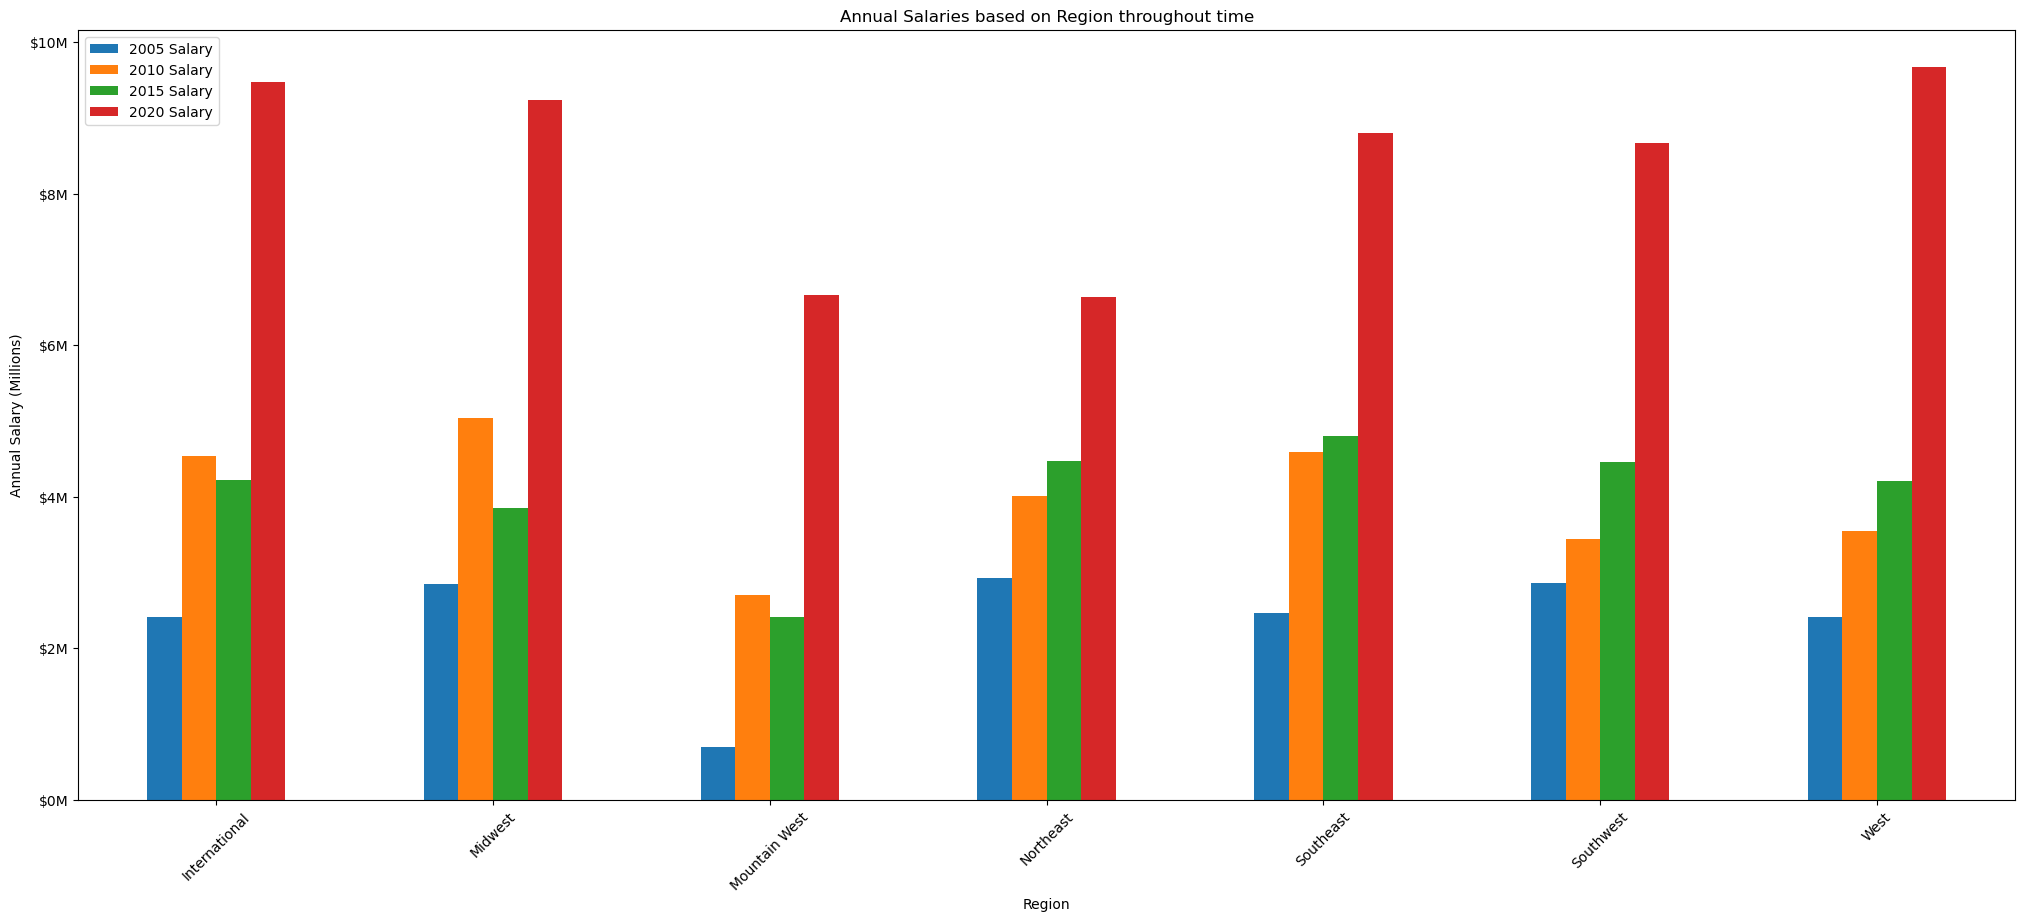

<Figure size 640x480 with 0 Axes>

In [46]:
# Add formatter to y_axis
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

multi_plot = salaries_merged_5_year_data.plot(kind="bar", figsize=(25,10))

# Set tick labels and axis labels
multi_plot.set_xticklabels(salaries_merged_5_year_data["Region"], rotation=45)
plt.yscale('linear')  # Use linear scale for y-axis

# Apply the millions_formatter to the y-axis ticks
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Annual Salaries based on Region throughout time")
plt.xlabel("Region")
plt.ylabel("Annual Salary (Millions)")
plt.show()
plt.show()
plt.tight_layout()